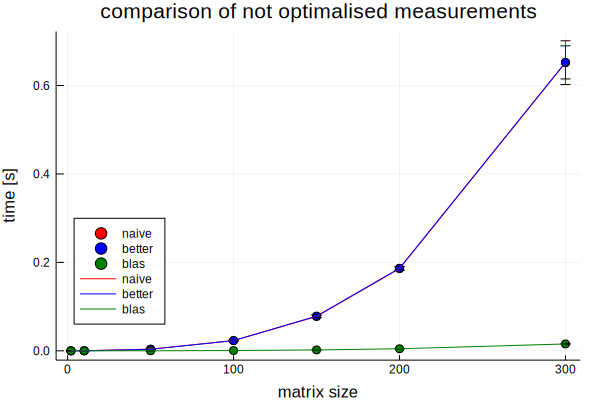

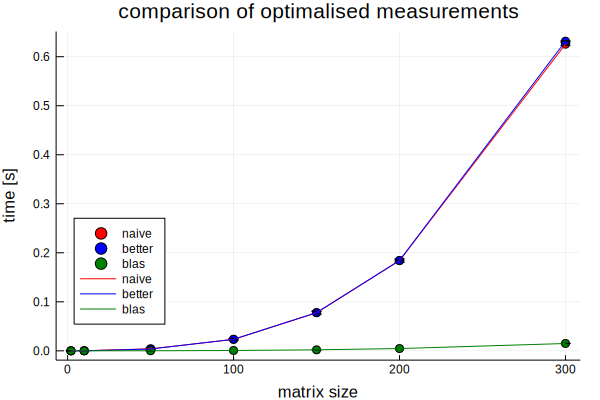

In [7]:
using CSV
using Plots
using Statistics

function new_scatter(input,scatter_title)
    data =CSV.read(input,delim=";")

    sizes=[]
    naive=[]
    better=[]
    blas=[]

    i=1;j=10
    while j <= size(data,1)
        push!(sizes,data[i,:sizes])
        naive10 = data[i:j,:naive]
        better10 = data[i:j,:better]
        blas10 = data[i:j,:blas]
        push!(naive,naive10)
        push!(better,better10)
        push!(blas,blas10)
        i+=10
        j+=10
    end

    # find mean of measurement for each matrix size
    mnaive = map(x->mean(x),naive)
    mbetter = map(x->mean(x),better)
    mblas= map(x->mean(x),blas)

    # find error for each mean
    errnaive = map(x->sqrt(var(x)),naive)
    errbetter = map(x->sqrt(var(x)),better)
    errblas = map(x->sqrt(var(x)),blas)

    s1 =scatter(sizes,[mnaive,mbetter,mblas],yerr=[errnaive errbetter errblas],colour=[:red :blue :green],label=["naive", "better" ,"blas"],legend=:bottomleft)
    plot!(sizes,[mnaive,mbetter,mblas],colour=[:red :blue :green],label=["naive" "better" "blas"],legend=:bottomleft)
    plot!(xlabel="matrix size",ylabel="time [s]",title=scatter_title)
    return s1
end



display(new_scatter("notoptimalised.csv","comparison of not optimalised measurements"))
display(new_scatter("optimalised.csv","comparison of optimalised measurements"))
